# Author: [Mohamed Stifi, Ayoub El Assioui]


# Introduction

In this lab, we will implement and evaluate three key learning algorithms: the Perceptron Learning Algorithm, the Pocket Algorithm, and the Delta Rule Learning Algorithm. Using a generated dataset characterized by nonlinear separability and noise, we will explore the performance of each algorithm through empirical error analysis and performance comparison. This investigation aims to enhance our understanding of these algorithms' strengths and limitations in classification tasks.

# Importing Learning Algorithms and Data Generation Functions

In this cell, we will import the necessary classes and functions required to implement our learning algorithms and generate the dataset. The `PerceptronLearningAlgorithm`, `PocketAlgorithm`, and `DeltaRuleLearningAlgorithm` will enable us to apply and compare the different learning methods. Additionally, we will utilize the data generation functions, `generate_data_linearly_separable`, `plot_linearly_separable_data`, and `plot_linearly_separable_data_3d`, to create and visualize our dataset, ensuring it meets the criteria of nonlinearly separable data.


In [1]:
from perceptron import PerceptronLearningAlgorithme
from pocket import PocketAlgorithm
from delta_rule import DeltaRuleLearningAlgorithm
from data_generation import (generate_data_linearly_separable,
                             plot_linearly_separable_data,
                             plot_linearly_separable_data_3d)

# Visualize the dataset

## Generating and Plotting Linearly Separable Data in 2D

In this cell, we generate a dataset of 100 samples in 2D that is linearly separable. The function `generate_data_linearly_separable` is called with a standard deviation of 40.0. The generated data and labels are then visualized using the `plot_linearly_separable_data` function to illustrate the clear separation between the two classes.


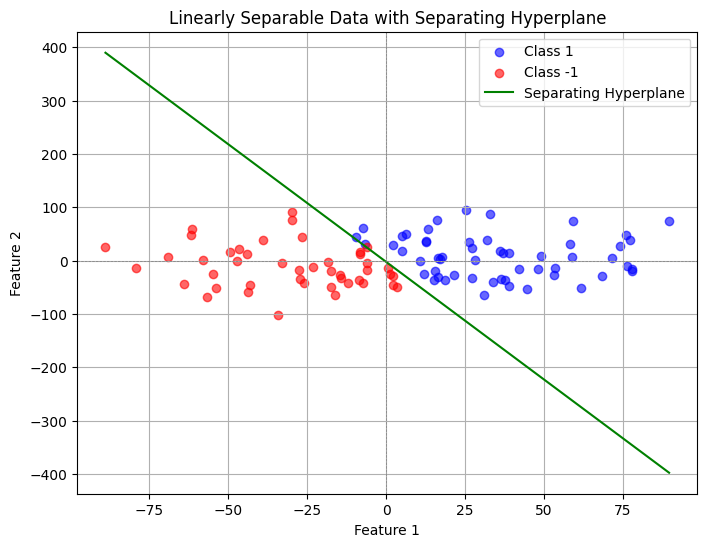

In [2]:
data, labels, w_spartor = generate_data_linearly_separable(100, 2, 40.0)
plot_linearly_separable_data(data, labels, w_spartor)

## Generating and Plotting Linearly Separable Data in 3D

This cell creates a dataset of 100 samples in 3D that is also linearly separable. Again, we use the `generate_data_linearly_separable` function, but this time with a standard deviation of 1.0 to demonstrate the differences in visualization. The resulting dataset is plotted using the `plot_linearly_separable_data_3d` function, providing a three-dimensional view of the linear separation.


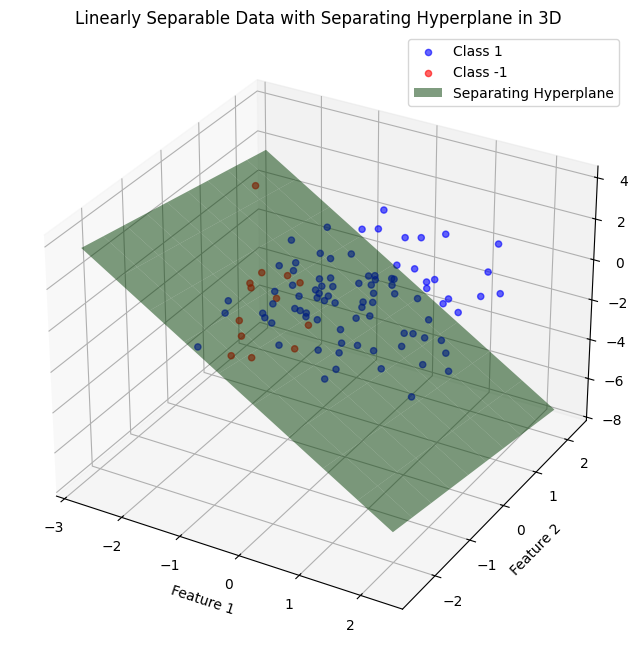

In [3]:
data, labels, w_spartor = generate_data_linearly_separable(100, 3, 1.0)
plot_linearly_separable_data_3d(data, labels, w_spartor)

## Generating and Plotting Non-Linearly Separable Data in 2D

Here, we generate a dataset of 100 samples in 2D that is non-linearly separable by introducing noise into the labels. The `generate_data_linearly_separable` function is called with a standard deviation of 40.0 and a noise parameter of 0.3, which flips a percentage of the labels. The resulting dataset is visualized using the `plot_linearly_separable_data` function to highlight the impact of noise on separability.


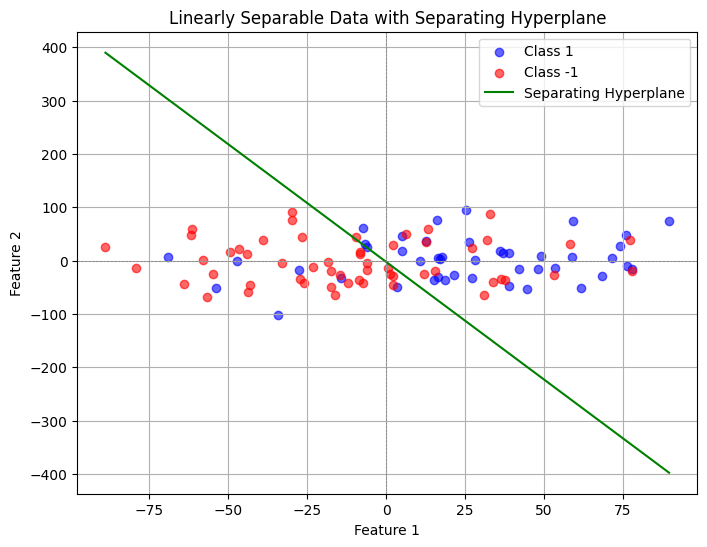

In [4]:
data, labels, w_spartor = generate_data_linearly_separable(100, 2, 40.0, with_noise=0.3)
plot_linearly_separable_data(data, labels, w_spartor)

## Generating and Plotting Non-Linearly Separable Data in 3D

In this final cell, we create a 3D dataset of 100 samples that is non-linearly separable, similar to the previous cell. The `generate_data_linearly_separable` function is called with a standard deviation of 40.0 and a noise parameter of 0.3. The data is then visualized using the `plot_linearly_separable_data_3d` function, allowing us to observe how the noise influences the separability in three dimensions.

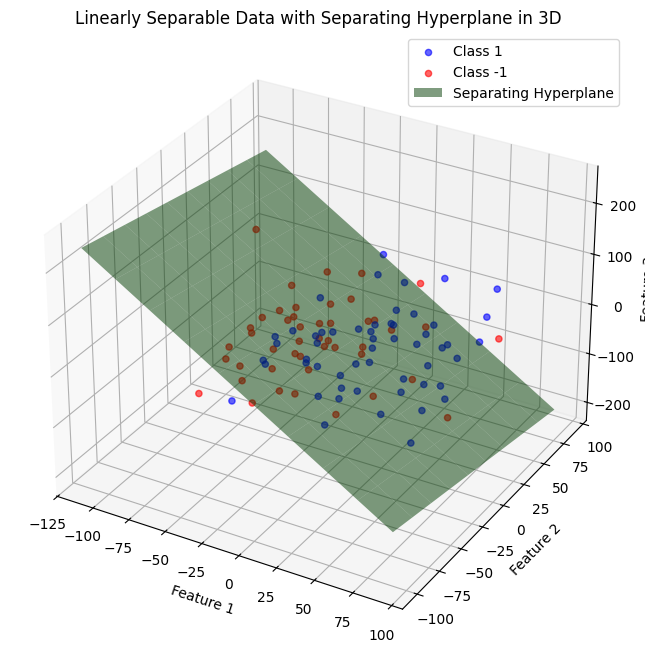

In [5]:
data, labels, w_spartor = generate_data_linearly_separable(100, 3, 40.0, with_noise=0.3)
plot_linearly_separable_data_3d(data, labels, w_spartor)

#

In [6]:
import matplotlib.pyplot as plt

def plot_loss(loss_values, title="Training Loss", xlabel="iter", ylabel="Loss"):
   
    plt.figure(figsize=(10, 6))
    plt.plot(loss_values, label='Loss', color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

# Parameter Initialization for Data Generation and Learning Algorithms

In this cell, we define a set of parameters for generating our dataset and configuring the learning algorithms. 

- **`pla_prams`**: This dictionary contains parameters for the Perceptron Learning Algorithm (PLA), specifying the number of samples (1000), the dimensionality of the data (2), the standard deviation for data distribution (10.0), and the tolerance for convergence (1).
  
- **`pocket_prams`**: This dictionary outlines the parameters for the Pocket Algorithm, including the same number of samples, data dimensionality, and standard deviation, along with the maximum number of iterations (1000) for the algorithm.

- **`delta_rule_prams`**: This dictionary is used for the Delta Rule Learning Algorithm, featuring parameters for the number of samples, data dimensionality, standard deviation, a small delta value (0.01) for convergence, the maximum number of iterations (1000), and the learning rate (0.003).

These parameters will guide the subsequent steps of data generation and algorithm application.


In [7]:
pla_prams = {'num_samples' : 1000, 'data_dim' : 2, 'data_std' : 10.0, 'tol' : 1}
pocket_prams = {'num_samples' : 1000, 'data_dim' : 2, 'data_std' : 10.0,
                'num_iter' : 1000}
delta_rule_prams = {'num_samples' : 1000, 'data_dim' : 2, 'data_std' : 10.0,
                     'delta':0.01, 'num_iter': 1000, 'lr' : 0.003}

# Perceptron Learning Algorithm 

## Initializing the Perceptron Learning Algorithm Model

In this cell, we create an instance of the `PerceptronLearningAlgorithme` class, passing in the parameters defined in the `pla_prams` dictionary. This initializes the model with the specified number of samples, dimensionality, standard deviation, and convergence tolerance. The model is now ready to be trained on the generated dataset.


In [8]:
perceptron_model = PerceptronLearningAlgorithme(**pla_prams)

##

## Training the Perceptron Model

Here, we call the `fit()` method on the `perceptron_model` instance. This method trains the Perceptron learning algorithm on the generated dataset, adjusting the model weights based on the input data and corresponding labels. The training process will iterate until the model converges or reaches the maximum number of iterations specified in the parameters.

In [9]:
perceptron_model.fit()


## Plotting the Loss Curve

In this cell, we visualize the evolution of the loss during the training process by plotting the loss values stored in `perceptron_model.ls`. This curve helps us assess how well the model is learning over iterations, indicating convergence behavior and overall training performance. A decreasing loss curve suggests effective learning, while fluctuations may indicate challenges in convergence.


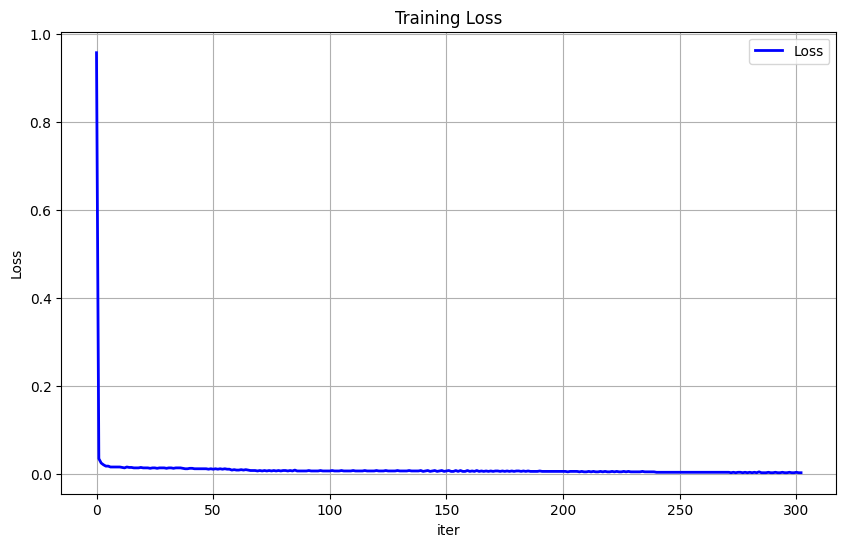

In [10]:
plot_loss(perceptron_model.ls)

## Visualizing the Decision Boundary

Finally, we visualize the data along with the predicted separator generated by the Perceptron model. The `plot_linearly_separable_data` function is called with the model's data, labels, and learned weights (`perceptron_model.w`). The title "Plot Data with the Predicted Separator Using Perceptron" is assigned to the plot. This visualization illustrates how the Perceptron has separated the two classes, providing insight into the effectiveness of the learning algorithm.

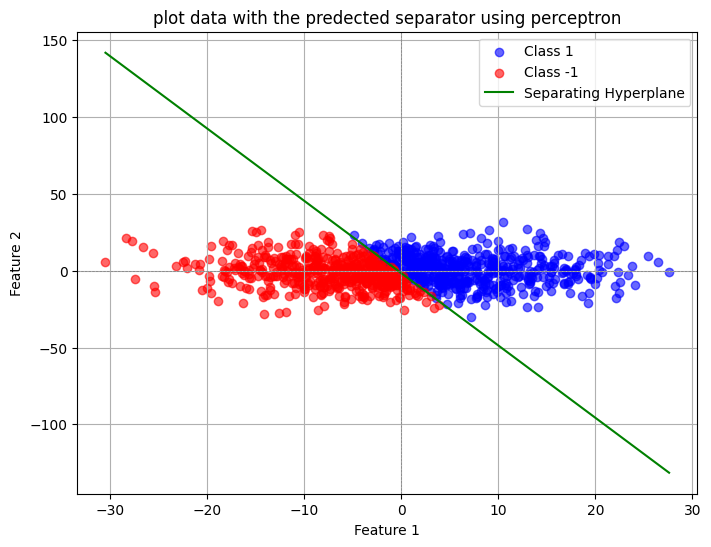

In [11]:
title = "plot data with the predected separator using perceptron"
plot_linearly_separable_data(perceptron_model.data, perceptron_model.labels, perceptron_model.w, title)

# Pocket Algorithm 

## Initializing the Pocket Algorithm Model

In this cell, we create an instance of the `PocketAlgorithm` class by passing the parameters defined in the `pocket_prams` dictionary. This sets up the model to handle 1000 samples with a dimensionality of 2 and a standard deviation of 10.0, ready for training. The Pocket Algorithm is particularly useful for improving performance on non-linearly separable data.


In [12]:
pocket_model = PocketAlgorithm(**pocket_prams)

## Training the Pocket Model

Here, we invoke the `fit()` method on the `pocket_model` instance. This method trains the Pocket Algorithm on the dataset, updating the model weights based on the input data and labels. The Pocket Algorithm uses a strategy to retain the best-performing weights observed during the training process, which helps improve classification accuracy, especially in challenging datasets.

In [13]:
pocket_model.fit()

## Plotting the Loss Curve

In this cell, we visualize the loss evolution during the training of the Pocket Algorithm by plotting the values stored in `pocket_model.ls`. This loss curve provides insights into the model's learning progress and effectiveness. A consistently decreasing trend would indicate that the algorithm is converging well, while any irregularities could suggest difficulties in learning.


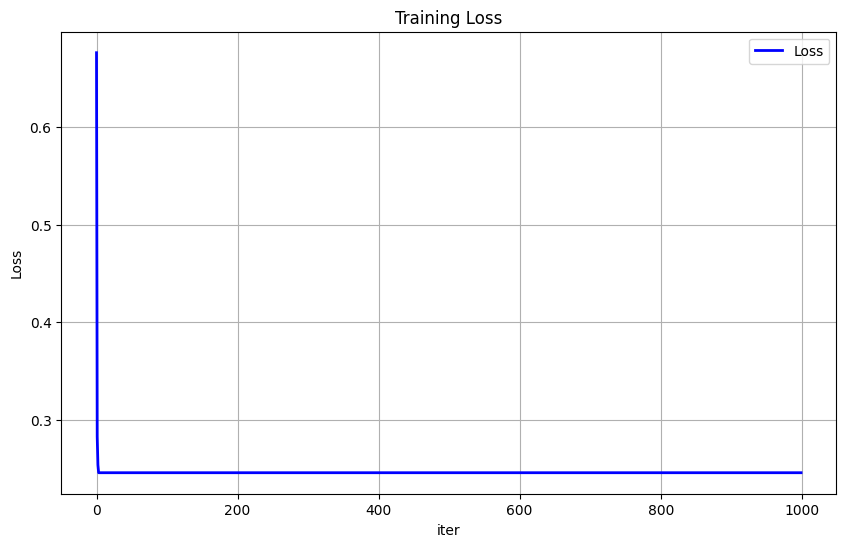

In [14]:
plot_loss(pocket_model.ls)

## Visualizing the Decision Boundary with Pocket

We visualize the dataset along with the predicted separator obtained from the Pocket Algorithm. Using the `plot_linearly_separable_data` function, we pass the data, labels, and learned weights (`pocket_model.w`), along with the title "Plot Data with the Predicted Separator Using Pocket." This plot allows us to assess how well the Pocket Algorithm has performed in separating the two classes.

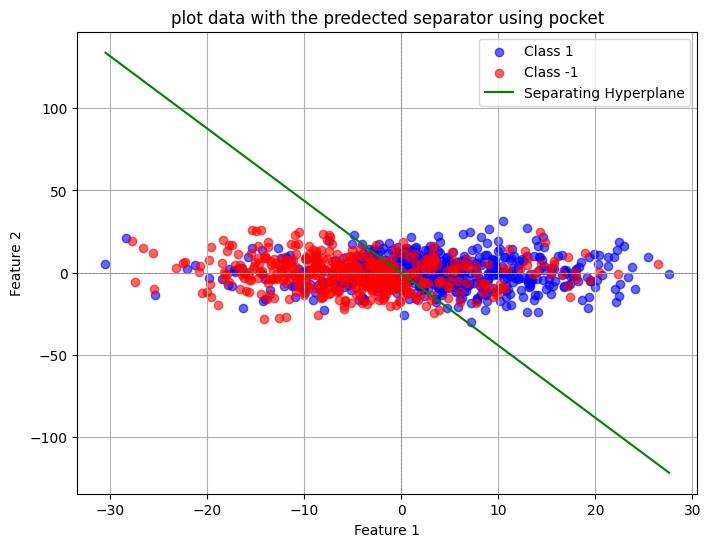

In [15]:
title = "plot data with the predected separator using pocket"
plot_linearly_separable_data(pocket_model.data, pocket_model.labels, pocket_model.w, title)

## Visualizing the Original Separator for Comparison

In this final cell, we plot the original separating hyperplane used for training the Pocket Algorithm. By calling `plot_linearly_separable_data` with the original weights (`pocket_model.w_spartor`), we can compare the original separator against the learned separator. The title "Plot Data with the Original Separator Using for Training Pocket" highlights this comparison, providing insights into how closely the Pocket Algorithm has approximated the ideal decision boundary.


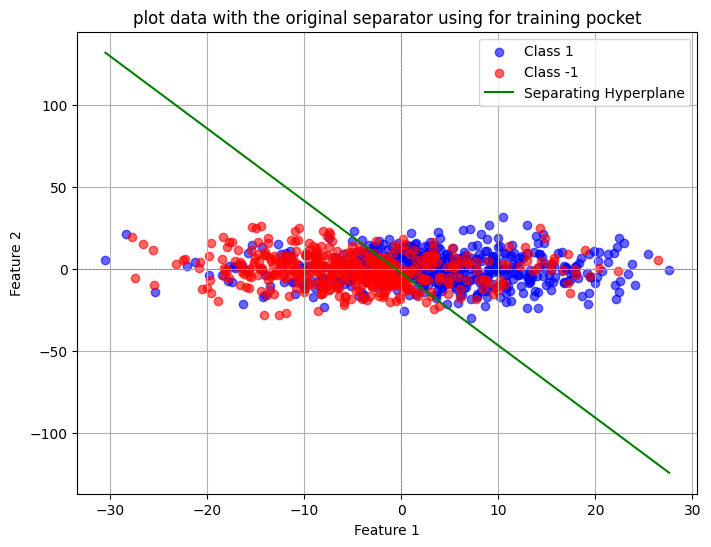

In [16]:
title = "plot data with the original separator using for training pocket"
plot_linearly_separable_data(pocket_model.data, pocket_model.labels, pocket_model.w_spartor, title)

# Delta Rule Learning Algorithm 

## Initializing the Delta Rule Learning Algorithm Model

In this cell, we create an instance of the `DeltaRuleLearningAlgorithm` class by passing the parameters defined in the `delta_rule_prams` dictionary. This initializes the model to handle 1000 samples with 2 dimensions, a standard deviation of 10.0, a small delta value of 0.01, a maximum of 1000 iterations, and a learning rate of 0.003. The Delta Rule is a gradient descent method that aims to minimize error during training.


In [17]:
delta_rule_model = DeltaRuleLearningAlgorithm(**delta_rule_prams)

## Training the Delta Rule Model

Here, we call the `fit()` method on the `delta_rule_model` instance. This method trains the Delta Rule Learning Algorithm on the generated dataset, updating the model weights based on the input data and corresponding labels. The algorithm applies the gradient descent approach to adjust the weights iteratively, allowing it to learn the optimal decision boundary.

In [18]:
delta_rule_model.fit()

(array([[0.04325439, 0.00711286, 0.05407354]]), np.float64(0.8143573908207422))

# Plotting the Loss Curve

In this cell, we visualize the loss evolution during the training process by plotting the values stored in `delta_rule_model.loss_history`. This curve gives us an overview of how effectively the model is learning over time. A downward trend indicates that the model is successfully minimizing its loss, while irregular patterns may suggest potential issues in convergence.

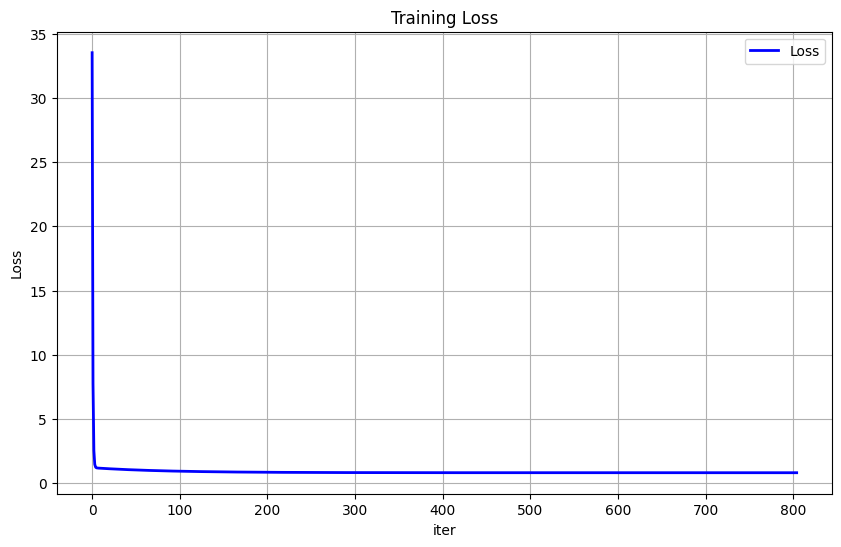

In [19]:
plot_loss(delta_rule_model.loss_history)

## Visualizing the Decision Boundary with Delta Rule

We visualize the dataset along with the predicted separator obtained from the Delta Rule model. The `plot_linearly_separable_data` function is called with the model's data, labels, and learned weights (`delta_rule_model.w`), along with the title "Plot Data with the Predicted Separator Using Delta Rule." This visualization helps us assess how well the Delta Rule has performed in separating the two classes.

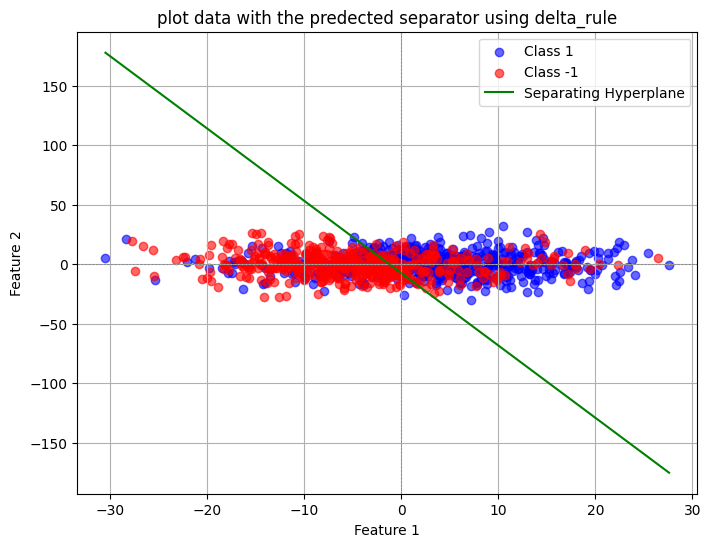

In [20]:
title = "plot data with the predected separator using delta_rule"
plot_linearly_separable_data(delta_rule_model.data, delta_rule_model.labels, delta_rule_model.w, title)

## Visualizing the Original Separator for Comparison

In this final cell, we plot the original separating hyperplane used for training the Delta Rule model. By using the `plot_linearly_separable_data` function with the original weights (`delta_rule_model.w_spartor`), we can compare the learned separator against the original decision boundary. The title "Plot Data with the Original Separator Using for Training Delta Rule" emphasizes this comparison, providing insights into the accuracy of the Delta Rule's predictions.

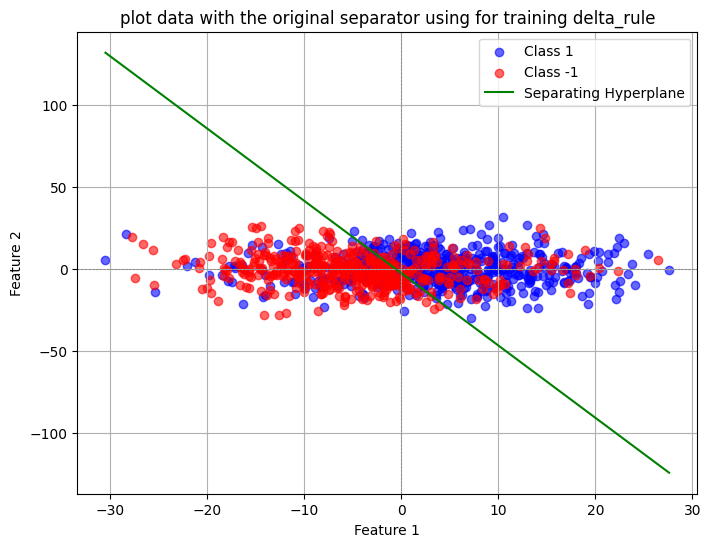

In [21]:
title = "plot data with the original separator using for training delta_rule"
plot_linearly_separable_data(delta_rule_model.data, delta_rule_model.labels, delta_rule_model.w_spartor, title)

# Conclusion

In this lab, we implemented and compared three learning algorithms: the Perceptron Learning Algorithm, the Pocket Algorithm, and the Delta Rule Learning Algorithm, using a generated dataset characterized by both linear and non-linear separability with added noise. 

The Perceptron Algorithm demonstrated effectiveness in learning linearly separable data, though its performance diminished with non-linearly separable data due to its inherent limitations. The Pocket Algorithm, which maintains the best weights observed during training, showed improved robustness, effectively addressing the noise in the dataset and yielding better classification accuracy.

The Delta Rule, leveraging a gradient descent approach, provided a more gradual and often smoother convergence, adapting well to the dataset's characteristics. Its ability to minimize error effectively allowed for a reliable decision boundary, though it required careful tuning of hyperparameters like learning rate and delta.

Overall, the comparison highlighted that while all three algorithms have their strengths, the Pocket Algorithm and Delta Rule performed better under challenging conditions of non-linear separability. Future work could involve experimenting with additional datasets, tuning hyperparameters, and exploring ensemble methods to further enhance classification performance.

# Appendix: Code Implementations of Learning Algorithms

In this section, we provide the code implementations for the learning algorithms and data generation functions utilized throughout this lab. This serves as a reference for understanding the underlying mechanics of each algorithm.

### 1. Perceptron Learning Algorithm `perceptron.py`

```python
from data_generation import generate_data_linearly_separable
import numpy as np



class PerceptronLearningAlgorithme:
    def __init__(self, num_samples, data_dim, data_std, tol=1):
        np.random.seed(0)
        self.num_samples = num_samples
        self.data, self.labels, self.w_spartor = generate_data_linearly_separable(
                                                    num_samples, data_dim, data_std
                                                    )
        self.x = np.concatenate((self.data, np.ones((num_samples,1))), axis=1)
        self.w = np.random.randn(1, data_dim + 1)
        self.tol = (tol+1)/num_samples
        self.ls = []
        self.ws = [self.w]
        
    def fit(self):
        ls , inds = self.loss()
        while ls > self.tol:
            self.ls.append(ls)
            self.w = self.w + self.labels[inds].T @ self.x[inds]
            self.ws.append(self.w)
            ls , inds = self.loss()

    def loss(self):
        output = np.dot(self.x, self.w.T)
        pred_labels = np.where(output > 0, 1, -1).astype(int)
        compare_pred_true =  pred_labels != self.labels
        num_misclassid = np.sum(compare_pred_true)
        indices_of_misclassid = np.where(compare_pred_true)[0]
        return float(num_misclassid/self.num_samples), indices_of_misclassid
```

### 2. Pocket Algorithm `pocket.py`

```python
import numpy as np
from data_generation import generate_data_linearly_separable

class PocketAlgorithm:
    def __init__(self, num_samples, data_dim, data_std, num_iter = 1000):
        np.random.seed(0)
        self.num_samples = num_samples
        self.data, self.labels, self.w_spartor = generate_data_linearly_separable(
                                                    num_samples, data_dim, data_std, with_noise= 0.3)
        self.x = np.concatenate((self.data, np.ones((num_samples,1))), axis=1)
        self.w = np.random.randn(1, data_dim + 1)
        # self.tol = (tol+1)/num_samples
        self.num_iter = num_iter
        self.ls = []
        self.ws = [self.w]

    def fit(self):
        w_iter = self.w
        for _ in range(self.num_iter):
            ls , inds = self.loss()
            w_iter = self.w + self.labels[inds].T @ self.x[inds]
            

            output = np.dot(self.x, w_iter.T)
            pred_labels = np.where(output > 0, 1, -1).astype(int)
            misclassifid_ratio = np.sum(pred_labels != self.labels)/self.num_samples

            if misclassifid_ratio < ls:
                self.w = w_iter
                self.ws.append(self.w)

            self.ls.append(ls)
            

    def loss(self):
        output = np.dot(self.x, self.w.T)
        pred_labels = np.where(output > 0, 1, -1).astype(int)
        compare_pred_true =  pred_labels != self.labels
        num_misclassid = np.sum(compare_pred_true)
        indices_of_misclassid = np.where(compare_pred_true)[0]
        return float(num_misclassid/self.num_samples), indices_of_misclassid

```

### 3. Delta Rule Learning Algorithm `delta_rule.py`

```python
import numpy as np
from data_generation import generate_data_linearly_separable

class DeltaRuleLearningAlgorithm:
    def __init__(self, num_samples, data_dim, data_std,
     delta=0.01, num_iter=1000, lr = 0.001):
        np.random.seed(0)
        self.num_samples = num_samples
        self.data, self.labels, self.w_spartor = generate_data_linearly_separable(
                                                    num_samples, data_dim, data_std, with_noise= 0.3)
        self.x = np.concatenate((self.data, np.ones((num_samples, 1))), axis=1)
        self.w = np.random.randn(1, data_dim + 1)
        self.delta = delta
        self.num_iter = num_iter
        self.loss_history = []
        self.lr = lr


    def loss(self, w):
        output = np.dot(self.x, w.T)
        errors = self.labels - output
        return np.mean(errors**2)

    def gradient(self, w):
        output = np.dot(self.x, w.T)
        errors = self.labels - output
        # grad = -2 * np.dot(errors.T, self.x) / self.num_samples
        return errors

    def fit(self):
        w_iter = self.w
        for _ in range(self.num_iter):
            errors = self.gradient(w_iter)
            grad = 2 * np.dot(errors.T, self.x) / self.num_samples
            if np.linalg.norm(grad) <= self.delta:
                break
            w_iter = w_iter + self.lr*grad
            self.loss_history.append(self.loss(w_iter))
        
        self.w = w_iter
        return self.w, self.loss_history[-1]
```

### 4. Data Generation Functions

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def generate_data_linearly_separable(n: int, dim: int, std: float, with_noise = None, normalize=False):
    """
    Generate linearly separable data with optional normalization.

    Parameters:
        n (int): Number of samples.
        dim (int): Dimensionality of the data.
        std (float): Standard deviation for the data distribution.
        with_noise (float, optional): Percentage of labels to flip as noise.
        normalize (bool, optional): If True, normalize the data across all dimensions.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: A tuple containing the generated data,
            corresponding labels, and the separating hyperplane weights.
    """
    np.random.seed(0)

    # w_spartor : (1, dim+1)
    w_spartor = np.random.randn(1, dim + 1)  # Shape (1, dim+1)

    data = np.random.randn(n, dim)  # (n, dim)
    data = std * data  # Scale by standard deviation

    # Optionally normalize the data across each dimension
    if normalize:
        data -= np.mean(data, axis=0)
        data /= np.std(data, axis=0)

    ones = np.ones((n, 1))  # (n, 1)

    x = np.concatenate((data, ones), axis=1)  # (n, dim+1)

    # Calculate the scalar product
    scalar_product = np.dot(x, w_spartor.T)  # (n,1)

    # Labeling the values: positive -> 1, negative -> -1
    labels = np.where(scalar_product > 0, 1, -1).astype(int)

    # Add noise by flipping labels for a certain percentage of data points
    if with_noise is not None:
        num = int(with_noise * n)
        for i in range(num):
            idx = np.random.randint(0, n)
            labels[idx] *= -1

    return data, labels, w_spartor



def plot_linearly_separable_data(data: np.ndarray, labels: np.ndarray, w_spartor: np.ndarray, title = None):
    """
    Plot linearly separable data along with the separating hyperplane.

    Parameters:
        data (np.ndarray): data of shape (n, 2).
        labels (np.ndarray): Corresponding labels of shape (n,).
        w_spartor (np.ndarray): Weights of the separating hyperplane of shape (1, 3).
    """
    plt.figure(figsize=(8, 6))

    # Plot the data points
    plt.scatter(data[np.where(labels == 1)[0]][:, 0], data[np.where(labels == 1)[0]][:, 1], 
                color='blue', label='Class 1', alpha=0.6)
    plt.scatter(data[np.where(labels == -1)[0]][:, 0], data[np.where(labels == -1)[0]][:, 1], 
                color='red', label='Class -1', alpha=0.6)

    # Calculate the line (y = mx + b) for the hyperplane
    x_values = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
    
    # Extract weights for the hyperplane
    w1, w2, b = w_spartor[0, 0], w_spartor[0, 1], w_spartor[0, 2]
    
    # Calculate corresponding y values for the hyperplane
    y_values = -(w1 * x_values + b) / w2

    # Plot the hyperplane
    plt.plot(x_values, y_values, color='green', label='Separating Hyperplane')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if title is None:
        title = 'Linearly Separable Data with Separating Hyperplane'
    plt.title(title)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()


def plot_linearly_separable_data_3d(data: np.ndarray, labels: np.ndarray, w_spartor: np.ndarray):
    """
    Plot linearly separable data along with the separating hyperplane in 3D.

    Parameters:
        data (np.ndarray): Data of shape (n, 3).
        labels (np.ndarray): Corresponding labels of shape (n,).
        w_spartor (np.ndarray): Weights of the separating hyperplane of shape (1, 4).
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data points
    ax.scatter(data[np.where(labels == 1)[0]][:, 0], data[np.where(labels == 1)[0]][:, 1], data[np.where(labels == 1)[0]][:, 2], 
               color='blue', label='Class 1', alpha=0.6)
    ax.scatter(data[np.where(labels == -1)[0]][:, 0], data[np.where(labels == -1)[0]][:, 1], data[np.where(labels == -1)[0]][:, 2], 
               color='red', label='Class -1', alpha=0.6)

    # Create a grid for the hyperplane
    x_values = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 10)
    y_values = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 10)
    X, Y = np.meshgrid(x_values, y_values)

    # Calculate corresponding Z values for the hyperplane
    w1, w2, w3, b = w_spartor[0, 0], w_spartor[0, 1], w_spartor[0, 2], w_spartor[0, 3]
    Z = -(w1 * X + w2 * Y + b) / w3

    # Plot the hyperplane
    ax.plot_surface(X, Y, Z, color='green', alpha=0.5, label='Separating Hyperplane')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Linearly Separable Data with Separating Hyperplane in 3D')
    ax.legend()
    plt.show()
```

### Notes

- Each class contains methods for initializing the model and training it on the dataset. The `fit` method in each class implements the specific algorithm's learning process.
- The data generation functions are responsible for creating datasets that simulate linearly and non-linearly separable data, ensuring they are suitable for training the algorithms.

This appendix provides a comprehensive overview of the code structures utilized in this lab, supporting further exploration and experimentation with these learning algorithms.